# **🌍 Analysis of World Economic Trends**  
_A deep dive into global economic patterns, insights, and projections._

---



## **Table of Contents**  
1. [🔍 Introduction](#-introduction)  
2. [📊 Data Overview](#-data-overview)  
3. [🛠️ Data Preprocessing](#-data-preprocessing)  
4. [🌐 Exploratory Data Analysis](#-exploratory-data-analysis)  
    - [📈 Economic Growth](#-economic-growth)  
    - [💹 Inflation Trends](#-inflation-trends)  
    - [🌾 Trade and Agriculture](#-trade-and-agriculture)  
5. [🤖 Model Building and Forecasting](#-model-building-and-forecasting)  
6. [🔑 Key Insights](#-key-insights)  
7. [📚 References](#-references)




## **Introduction**  
_What drives global economies? This analysis explores key economic trends, offering insights into growth, inflation, and trade patterns._  

- **Objective:** Understand and analyze global economic trends.  
- **Data Sources:** Mention datasets and their sources (e.g., World Bank, IMF).  
- **Scope:** Highlight the scope and potential applications of the analysis.




## **Data Overview**  
_An overview of the datasets used in the analysis._  



- **Dataset Details:**  
  | Feature | Description |  
  |---------|-------------|  
  | `Year` | Year of observation. |  
  | `GDP` | Gross Domestic Product. |  
  | `Inflation` | Annual inflation rate. |  
  | `Trade` | Trade volume and balance. |  

- **Summary Statistics:** _Showcase basic data stats like mean, median, and distribution._



In [29]:
import pandas as pd
import numpy as np

In [30]:
# Load the excel file
data = pd.ExcelFile('WorldBank.xlsx')

# Display sheet names to understand the structure of the file
data.sheet_names


['Development Indicators']

In [ ]:
# Load the "Development Indicators" sheet
df = data.parse('Development Indicators')

# Display the first few rows and the column names to understand the data structure
df.head(), df.columns


**Observations:**

- The dataset contains multiple years of data for each country. Population needs to be calculated using the formula: 

Population (millions) = GDP (USD) / GDP per capita (USD) ÷1,000,000
 
Next, I will calculate the Population (millions) column and clean the dataset for further analysis.

In [32]:
# Calculate the population in millions and add it as a new column
df['Population (M)'] = (df['GDP (USD)'] / df['GDP per capita (USD)']) / 1e6

# Check for missing or anomalous data
missing_summary = df.isnull().sum()



In [ ]:
# Display the dataset structure after adding population and missing data summary
display(df.head()), missing_summary


**Missing Data Summary**

Significant gaps exist in the following indicators:

- Electric power consumption: 6,601 missing values.
- Individuals using the Internet: 7,385 missing values.
- GDP per capita: 2,874 missing values, leading to corresponding missing values in Population (millions).

In [34]:
# Find the minimum value in the `Year` column
min_year = df['Year'].min()

# Find the maximum value in the `Year` column
max_year = df['Year'].max()

# Print the minimum and maximum year
print(f"The year range of the data is: {min_year} to {max_year}")

The year range of the data is: 1960 to 2018


/tmp/ipykernel_1941/4227556369.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_data_by_year = df.groupby('Year').apply(lambda x: x.isnull().mean())


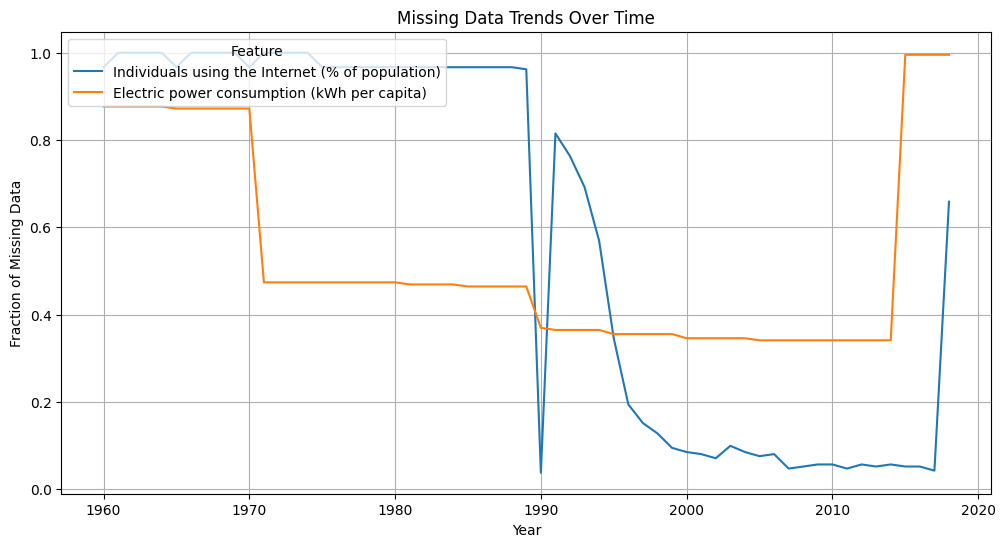

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a missing data percentage by year
missing_data_by_year = df.groupby('Year').apply(lambda x: x.isnull().mean())

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=missing_data_by_year[['Individuals using the Internet (% of population)', 
                                        'Electric power consumption (kWh per capita)']],
             dashes=False)
plt.title('Missing Data Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Fraction of Missing Data')
plt.grid(True)
plt.legend(title='Feature', loc='upper left')
plt.show()


**Observations from the Chart:**

Internet Usage (% of Population):

Almost no data exists before 1990, which aligns with the lack of widespread internet adoption during that time.
After 1990, the missing data decreases significantly, reflecting improved global reporting and adoption rates.
A spike in missing data closer to 2020 may indicate incomplete or pending data for recent years.
Electric Power Consumption (kWh per Capita):

Nearly all data is missing prior to the 1970s, suggesting either lack of measurement or documentation in earlier years.
From the mid-1970s onward, missing data decreases significantly, likely due to better reporting infrastructure.
Towards the end of the timeframe, the percentage of missing data rises sharply again, possibly due to gaps in recent reporting.

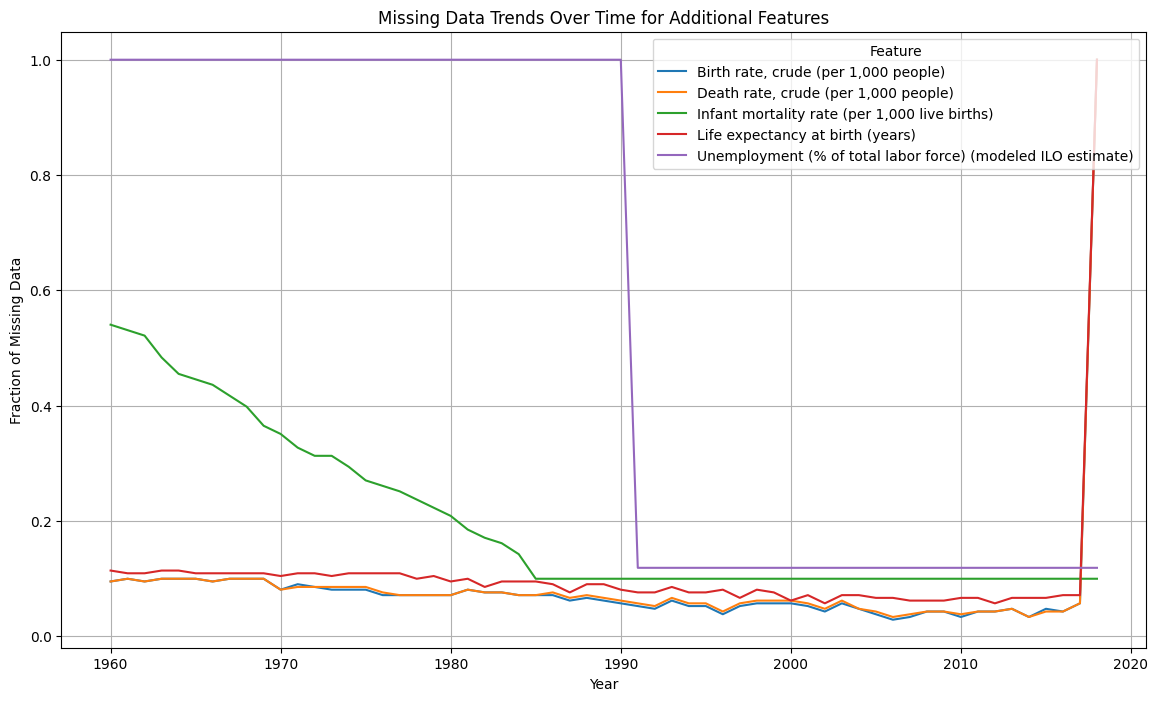

In [36]:
# Columns to assess
additional_features = [
    'Birth rate, crude (per 1,000 people)',
    'Death rate, crude (per 1,000 people)',
    'Infant mortality rate (per 1,000 live births)',
    'Life expectancy at birth (years)',
    'Unemployment (% of total labor force) (modeled ILO estimate)'
]

# Calculate missing data fraction by year for these features
missing_data_trends = df.groupby('Year')[additional_features].apply(lambda x: x.isnull().mean())

# Plot missing data trends
plt.figure(figsize=(14, 8))
for column in additional_features:
    sns.lineplot(data=missing_data_trends[column], label=column)

plt.title('Missing Data Trends Over Time for Additional Features')
plt.xlabel('Year')
plt.ylabel('Fraction of Missing Data')
plt.legend(title='Feature', loc='upper right')
plt.grid(True)
plt.show()


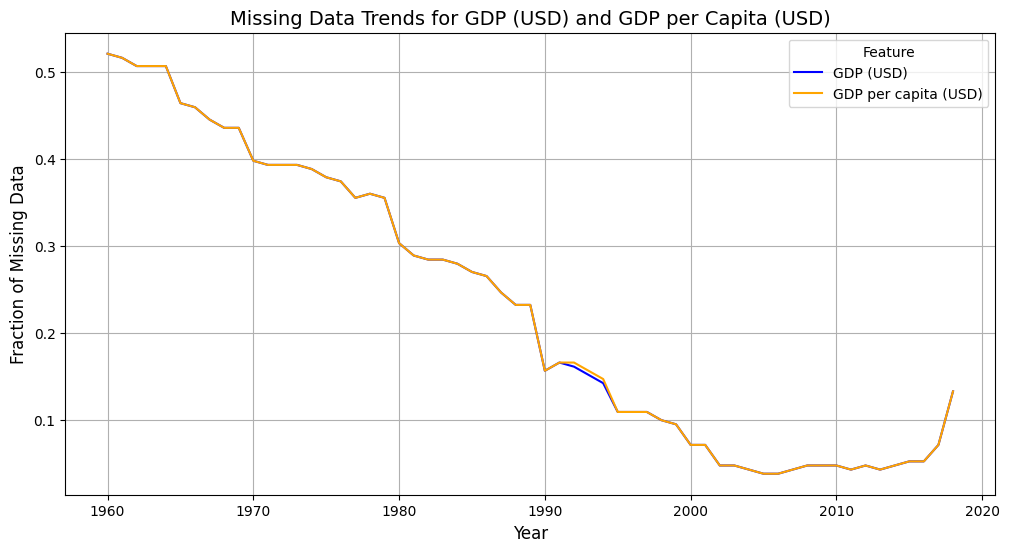

In [37]:
# Extract missing value trends for GDP and GDP per capita
gdp_missing = df.groupby('Year')['GDP (USD)'].apply(lambda x: x.isna().mean())
gdp_per_capita_missing = df.groupby('Year')['GDP per capita (USD)'].apply(lambda x: x.isna().mean())

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(gdp_missing, label='GDP (USD)', color='blue')
plt.plot(gdp_per_capita_missing, label='GDP per capita (USD)', color='orange')
plt.title('Missing Data Trends for GDP (USD) and GDP per Capita (USD)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fraction of Missing Data', fontsize=12)
plt.legend(title='Feature')
plt.grid(True)
plt.show()


## **Data Preprocessing**  
_Steps to clean and prepare the data._  

- Handling missing values.  
- Scaling and normalization techniques.  
- Data transformation or feature engineering.  



In [38]:
# Drop rows where GDP or GDP per capita (critical columns) are missing
cleaned_df = df.dropna(subset=['GDP (USD)', 'GDP per capita (USD)'])

# Recalculate Population (millions) after cleaning
cleaned_df.loc[:, 'Population (M)'] = (cleaned_df['GDP (USD)'] / cleaned_df['GDP per capita (USD)']) / 1e6

# Inspect the cleaned data
print("Shape of the cleaned dataset:", cleaned_df.shape)
display(cleaned_df.head())


Shape of the cleaned dataset: (9575, 16)


,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856


In [39]:
# Dropping rows with missing values for Birth Rate, Death Rate, and Life Expectancy
cleaned_df = cleaned_df.dropna(subset=[
    'Birth rate, crude (per 1,000 people)',
    'Death rate, crude (per 1,000 people)',
    'Life expectancy at birth (years)'
])

# Applying linear interpolation for Unemployment and Infant Mortality Rate
cleaned_df['Unemployment (% of total labor force) (modeled ILO estimate)'] = cleaned_df[
    'Unemployment (% of total labor force) (modeled ILO estimate)'].interpolate()

cleaned_df['Infant mortality rate (per 1,000 live births)'] = cleaned_df[
    'Infant mortality rate (per 1,000 live births)'].interpolate()

# Displaying the first few rows to confirm cleaning
cleaned_df.head()


,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856
5,Afghanistan,AFG,South Asia,Low income,2013,36.670,7.380,NaN,2.056110e+10,637.165,5.90,57.3,62.525,49.4280,1.725,32.269663


**Era-Specific Imputation for Internet Usage:**

- For years prior to 1990, it’s reasonable to impute zeros for internet usage.
- Post-1990, imputation can rely on averages grouped by income level.

**Era-Specific Imputation for Electric Power Consumption:**

- For years prior to the 1970s, imputing zeros makes sense, reflecting the lack of available data rather than actual consumption.
- Post-1970, imputing missing values using regional averages ensures consistency.

In [40]:
# Handle Internet Usage: Assume no data before 1990, as the internet wasn't widespread
cleaned_df['Individuals using the Internet (% of population)'] = cleaned_df.apply(
    lambda row: 0 if row['Year'] < 1990 else row['Individuals using the Internet (% of population)'], axis=1
)

# Impute remaining Internet Usage data post-1990 with income group means
cleaned_df['Individuals using the Internet (% of population)'] = cleaned_df.groupby('IncomeGroup')[
    'Individuals using the Internet (% of population)'
].transform(lambda x: x.fillna(x.mean()))

# Handle Electric Power Consumption: Use zeros before 1960 (early industrialization periods)
cleaned_df['Electric power consumption (kWh per capita)'] = cleaned_df.apply(
    lambda row: 0 if row['Year'] < 1960 else row['Electric power consumption (kWh per capita)'], axis=1
)

# Fill post-1960 missing values with regional means
cleaned_df['Electric power consumption (kWh per capita)'] = cleaned_df.groupby('Region')[
    'Electric power consumption (kWh per capita)'
].transform(lambda x: x.fillna(x.mean()))


In [41]:
cleaned_df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,199.284776,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,199.284776,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,199.284776,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,199.284776,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856
5,Afghanistan,AFG,South Asia,Low income,2013,36.670,7.380,199.284776,2.056110e+10,637.165,5.90,57.3,62.525,49.4280,1.725,32.269663


In [43]:
# Drop rows where 'Population density (people per sq. km of land area)' has missing values
final_cleaned_df = cleaned_df.dropna(subset=['Population density (people per sq. km of land area)'])

# Verify that no missing values remain in this column
remaining_missing_values = final_cleaned_df.isnull().sum()

# Summary of the cleaned data
final_cleaned_df_info = final_cleaned_df.info()

remaining_missing_values, final_cleaned_df_info


<class 'pandas.core.frame.DataFrame'>
Index: 8697 entries, 1 to 12447
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  8697 non-null   object 
 1   Country Code                                                  8697 non-null   object 
 2   Region                                                        8697 non-null   object 
 3   IncomeGroup                                                   8697 non-null   object 
 4   Year                                                          8697 non-null   int64  
 5   Birth rate, crude (per 1,000 people)                          8697 non-null   float64
 6   Death rate, crude (per 1,000 people)                          8697 non-null   float64
 7   Electric power consumption (kWh per capita)                   8697 non-nu

(Country Name                                                    0
 Country Code                                                    0
 Region                                                          0
 IncomeGroup                                                     0
 Year                                                            0
 Birth rate, crude (per 1,000 people)                            0
 Death rate, crude (per 1,000 people)                            0
 Electric power consumption (kWh per capita)                     0
 GDP (USD)                                                       0
 GDP per capita (USD)                                            0
 Individuals using the Internet (% of population)                0
 Infant mortality rate (per 1,000 live births)                   0
 Life expectancy at birth (years)                                0
 Population density (people per sq. km of land area)             0
 Unemployment (% of total labor force) (modeled ILO estimate) 


## **Analysis of Key Indicators**  


### **Population Trends**


To analyze Population Trends, we'll focus on:

- **Global Population Growth:**
  - Analyze how population size has changed over time.
- **Regional Population Dynamics:**
  - Compare population densities across regions to understand growth pressures.
- **Key Patterns and Outliers:**
  - Highlight countries or regions with notable growth or decline.


**📈 Economic Growth**  
_Visualizing trends in GDP across regions._  

- Key Questions:  
  - Which countries have the fastest-growing economies?  
  - How does GDP vary over time?  
-   





### **💹 Inflation Trends**  
_Analyzing inflation rates globally._  

- Key Questions:  
  - What are the trends in inflation rates?  
  - Are there patterns among developed vs. developing nations?  
- **Visualization:** Heatmaps, scatter plots.  

---



### **🌾 Trade and Agriculture**  
_Understanding trade volumes and agricultural contributions._  

- Key Questions:  
  - How do trade balances impact GDP?  
  - What are the top exports and imports by region?  
- **Visualization:** Bubble charts, stacked area plots.  

---



## **🤖 Model Building and Forecasting**  
_Applying predictive models to forecast economic trends._  

- Models Used:  
  - Time Series Analysis (e.g., ARIMA, LSTM).  
  - Regression Models for forecasting GDP and inflation.  
- **Evaluation Metrics:** RMSE, MAE, R-squared.  

---



## **🔑 Key Insights**  
_Summary of findings and their implications._  

- **Economic Growth Drivers:** _E.g., Technology, trade liberalization._  
- **Challenges:** _E.g., Climate change, income inequality._  
- **Future Directions:** _E.g., Policy recommendations or areas for further study._  

---



## **📚 References**  
_List of all data sources, tools, and papers cited._  

---

